## Decision Trees example using sklearn & Iris Flower Dataset

In [1]:
# Loading basic libraries
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn import datasets, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle

In [2]:
# Loading data
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Displaying dataset
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = pd.Series(iris.target)

irisdf
# Also refer to snapiris.png (Screenshot from: https://en.wikipedia.org/wiki/Iris_flower_data_set)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
# Visualize data
# Refer to irisplot.png (https://commons.wikimedia.org/wiki/File:Iris_dataset_scatterplot.svg)

In [4]:
# Shuffling the dataset
irisdf_shuf_np = shuffle(irisdf).to_numpy()
X_shuf = irisdf_shuf_np[:,:-1]
y_shuf = irisdf_shuf_np[:,-1]

In [5]:
# Creating training and testing datasets (80:20 split)
X_train = X_shuf[:120]
X_test = X_shuf[120:]
y_train = y_shuf[:120]
y_test = y_shuf[120:]

In [6]:
# Fitting the classifiers
clf_ig = DecisionTreeClassifier(criterion="gini", random_state=42)
clf_en = DecisionTreeClassifier(criterion="entropy", random_state=42)
model_ig = clf_ig.fit(X_train, y_train)
model_en = clf_en.fit(X_train, y_train)

In [7]:
# Printing a text representation
ig_text_rep = tree.export_text(clf_ig)
print(ig_text_rep)

|--- feature_2 <= 2.45
|   |--- class: 0.0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.35
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_1 <= 2.45
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- feature_1 >  2.45
|   |   |   |   |   |--- class: 2.0
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- class: 1.0
|   |   |--- feature_2 >  5.35
|   |   |   |--- class: 2.0
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2.0
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1.0
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2.0



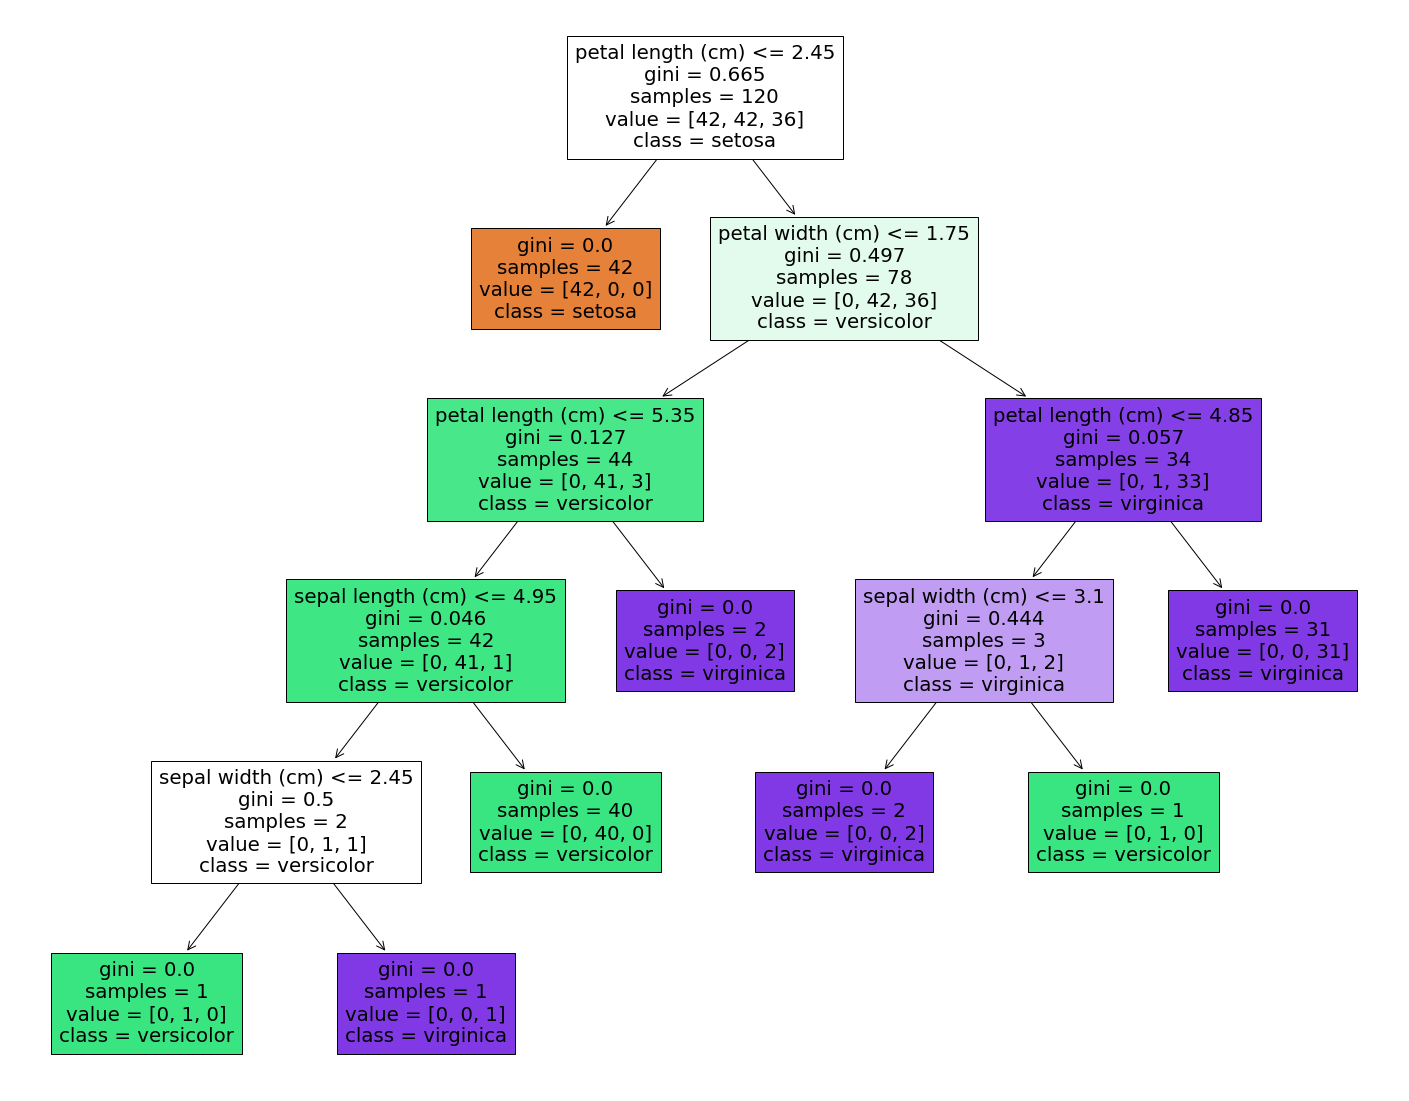

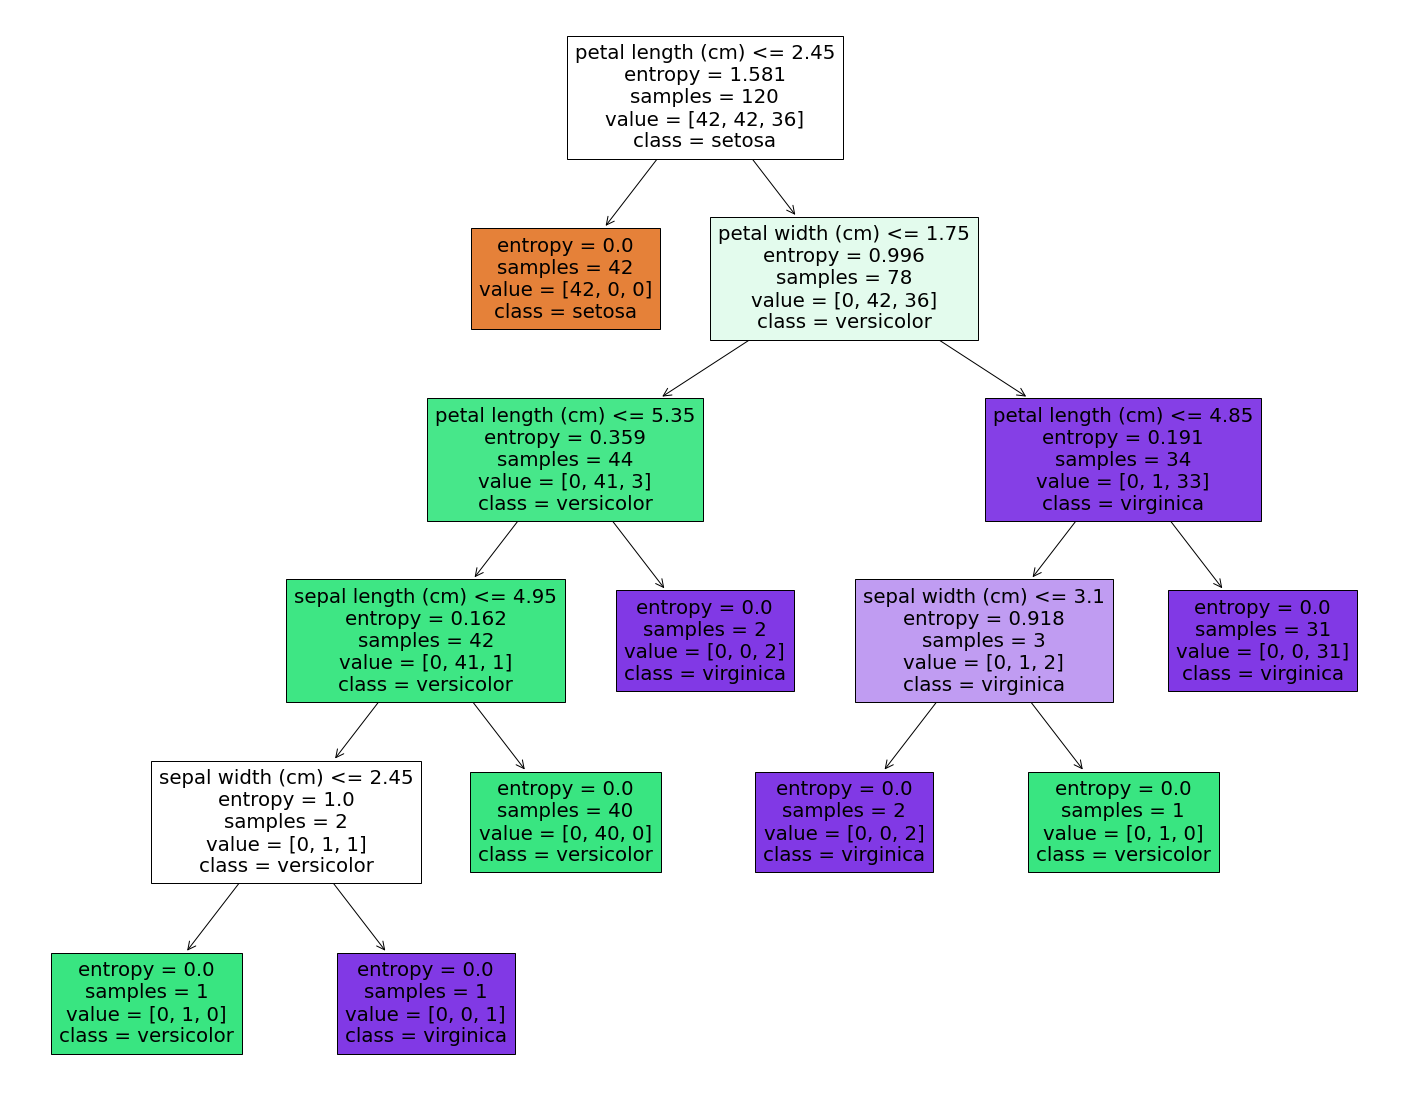

In [8]:
# Visualizing the trees
fig_ig = plt.figure(figsize=(25,20))
viz_ig = tree.plot_tree(
    clf_ig, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,
    filled=True
)

# Visualizing the tree
fig_en = plt.figure(figsize=(25,20))
viz_en = tree.plot_tree(
    clf_en, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,
    filled=True
)

In [9]:
# Saving the image
# fig_ig.savefig("dtree_ig.png")
# fig_en.savefig("dtree_en.png")

### Inferencing

In [10]:
iris.feature_names, iris.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [11]:
# Consider a certain index in (X_test, y_test)
index = 2
for i in iris.feature_names:
    print(i, end="\t")
print("Species")
for i in X_test[index]:
    print(i, end="\t\t\t")
print(iris.target_names[int(y_test[index])])

sepal length (cm)	sepal width (cm)	petal length (cm)	petal width (cm)	Species
6.7			3.3			5.7			2.5			virginica


In [12]:
clf_en.predict([X_test[index]])

array([2.])

In [13]:
# Simple check
pred_ig = clf_ig.predict(X_test)
pred_en = clf_en.predict(X_test)

err_ig = pred_ig - y_test
err_en = pred_en - y_test

# Prediction Errors
err_ig, err_en

(array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.]))

## Other ways to visualize 
### Graphviz

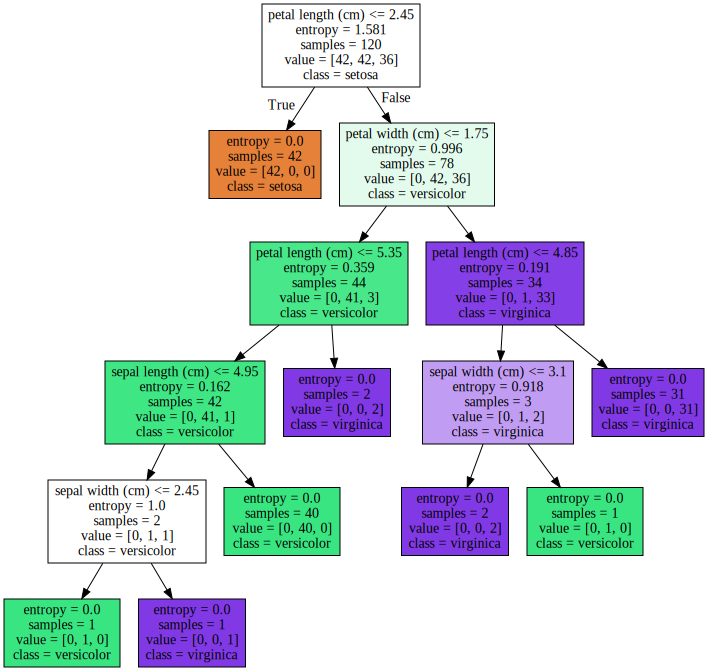

In [14]:
import graphviz

# Converting to DOT format
dot_data = tree.export_graphviz(
    clf_en, out_file=None, 
    feature_names=iris.feature_names,  
    class_names=iris.target_names,
    filled=True
)

# Drawing graph
gviz = graphviz.Source(dot_data, format="png") 
gviz

In [15]:
# Saving graphviz visualization
# gviz.render("dtree_gviz")

### dtreeviz

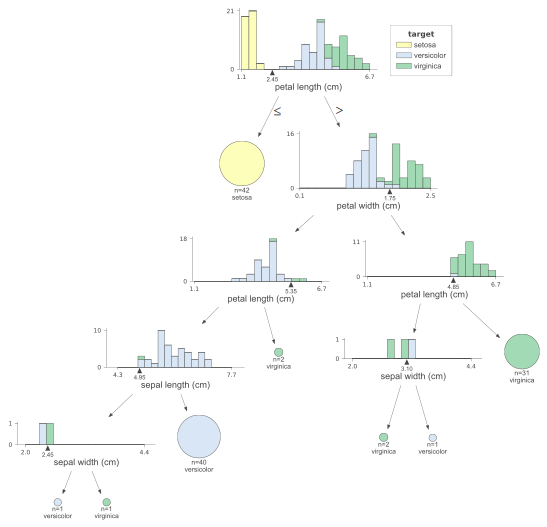

In [16]:
from dtreeviz.trees import dtreeviz

dviz = dtreeviz(
    clf_en, X_train, y_train,
    target_name="target",
    feature_names=iris.feature_names,
    class_names=list(iris.target_names)
)

dviz

In [17]:
# Saving dtreeviz visualization
# dviz.save("dtree_dviz_en.svg")